In [2]:
%matplotlib widget
from fileinput import filename
import matplotlib
import xarray as xr
import numpy as np
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation, FFMpegWriter

from pathlib import Path


In [3]:
figsize = (6,5)
matplotlib.rcParams['figure.figsize'] = figsize
params_temp = dict(vmin=250, vmax=290)

In [4]:
dir_data = Path("../data/reduced")
# dir_fig = Path("../fig")
dir_fig = Path("../data/fig")
dir_vid = dir_fig/ "vid"

f_var_fun = lambda var : f"hundred_members_{var}_pf.nc"
f_var = {var:f_var_fun(var) for var in
    ["2t",
    "msl",
    "10fg",
    "tp"]}

In [64]:
## Utilities
def datef(X):
    return X.time.dt.strftime('%Y-%m-%d %Hh').values

In [5]:
filename = dir_data/f_var["2t"]

In [6]:
da = xr.load_dataset(filename)
da = da.assign_coords({"longitude": [ i if i <= 180 else i-360 for i in da.longitude.values]})
# reduce spatial range
da_big = da.sel(longitude=slice(-20,20),latitude=slice(65,35))
da=da.sel(longitude=slice(-20,20),latitude=slice(50,40))


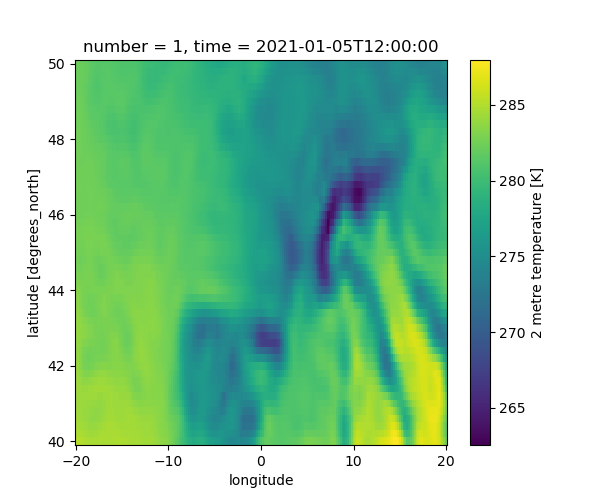

In [7]:
da.sel(number=1).isel(time=1).t2m.plot(figsize=figsize)

In [8]:
da_mean = da.mean(dim="number")

In [9]:
# # (da.sel(number=i)-da_mean).isel(time=10).t2m.plot(figsize=tuple([n/5 for n in figsize]))
# fig, axs = plt.subplots(4,5)
# for i,E in enumerate(range(1,101,5)):
#     ax = axs.flatten()[i]
#     (da.sel(number=E)-da_mean).isel(time=10).t2m.plot(ax=ax)
#     ax.axes.xaxis.set_visible(False)
#     ax.axes.yaxis.set_visible(False)

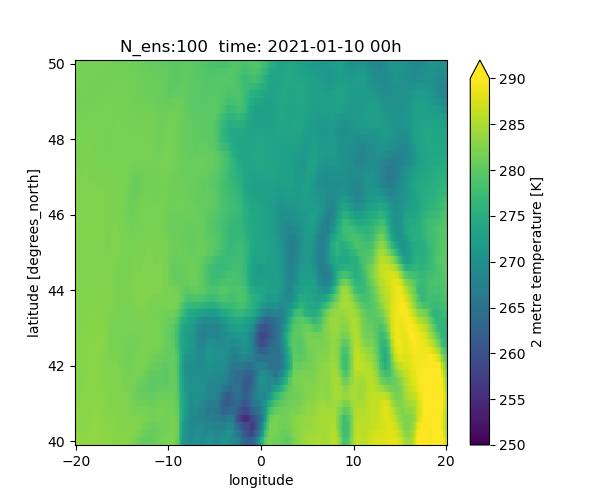

In [73]:
## Animation 
# simple temperature (5 repeat)

Ns=[10,20,50,100]# 100
n_repetitions = 5

for N in Ns:
    plt.close()
    fig, ax = plt.subplots()

    artists = []
    for E in range(1,101,100//N):
        # ds = (da.sel(number=E)-da_mean).isel(time=10).t2m
        params = dict(vmin=250, vmax=290)
        ds = da.sel(number=E).isel(time=10).t2m
        im = ds.plot(animated=True,add_colorbar=False,**params)
        if E==1:
            ds.plot(**params)
        ax.set_title(f"N_ens:{N:3}  time: {datef(ds)}")
        artists.append([im])
    artists = artists*n_repetitions



    ani = ArtistAnimation(fig, artists, interval=2000//N, blit=True,
                                    repeat_delay=1000)

    # To save the animation, use e.g.

    ani.save(dir_vid/f"ensembles_temp_{N}.mp4")

# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

# plt.show()

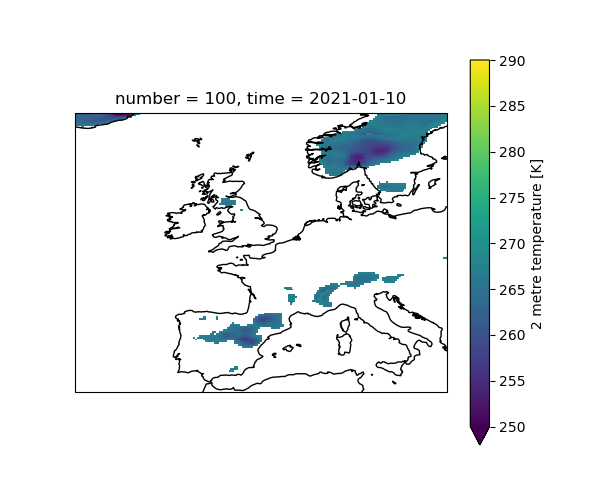

In [74]:
## Animation 
# threshold temperature - freezing++

Ns=[20,10,50,100]
n_repetitions = 5
temp_threshold = 268 # 273.15

projection= ccrs.PlateCarree()
transform = ccrs.PlateCarree()
params = params_temp.copy()
params['transform']=transform

for N in Ns:
    plt.close()

    fig, ax = plt.subplots(subplot_kw=dict(projection=projection))
    ax.coastlines(resolution='50m')
    dt = da_big.isel(time=10)
    ax.set_title(f"N_ens:{N:3}  time: {datef(dt)}")
    
    artists = []
    for E in range(1,101,100//N):
        ds = dt.sel(number=E).t2m
        ds = ds.where(ds<temp_threshold) # threshold on freezing 
        
        im = ds.plot(animated=True,add_colorbar=False,**params)
        if E==1:
            ds.plot(**params)
        artists.append([im])
    artists = artists*n_repetitions



    ani = ArtistAnimation(fig, artists, interval=2000//N, blit=True,
                                    repeat_delay=1000)

    # To save the animation, use e.g.

    ani.save(dir_vid/f"ensembles_freezing_{N}.mp4")




In [12]:
# ## Animation temperature contours

# fig, ax = plt.subplots()

# N=50
# artists = []
# for E in range(1,101,100//N):
#     # plt.cla()
#     # ds = (da.sel(number=E)-da_mean).isel(time=10).t2m
#     params = dict()#vmin=250, vmax=290)
#     ds = da.sel(number=E).isel(time=10).t2m
#     im = ds.plot.contourf(**params,add_colorbar=False,animated=True)
#     if E==1:
#         ds.plot.contourf(**params)
#     artists.append([im])
    
# artists = artists*5

# ani = ArtistAnimation(fig, artists, interval=2000//N, blit=True,
#                                 repeat_delay=1000)

# # To save the animation, use e.g.

# ani.save(dir_vid/f"ensembles{N}_contourf.mp4")


Text(0.5, 1.0, 'ens:  9  time: 2021-01-10 00h')

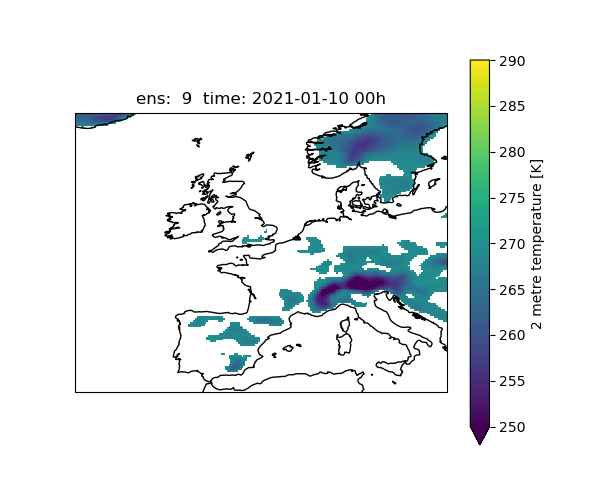

In [69]:
plt.close()
number= 9
projection= ccrs.PlateCarree()
transform = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw=dict(projection=projection))

ds = da_big.sel(number=number).isel(time=10).t2m
ds = ds.where(ds<270)
ds.plot(ax=ax,**params_temp,transform=transform)
ax.coastlines(resolution='50m')
ax.set_title(f"ens:{number:3}  time: {datef(ds)}")



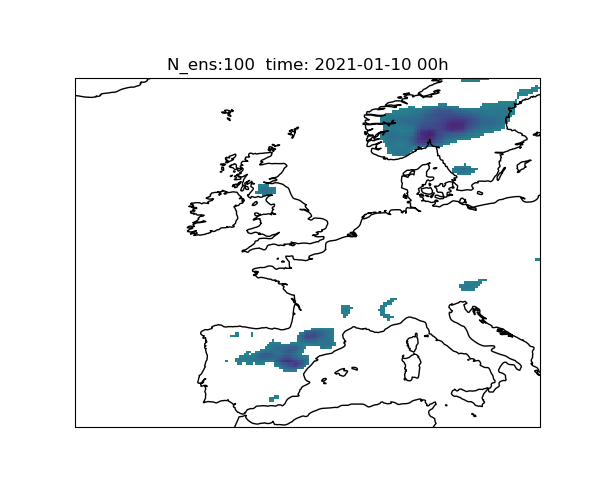

In [79]:
## Animation threshold temperature - freezing++

Ns=[10,20,50,100] # 10,20,50,100]
n_repetitions = 5
temp_threshold = 268 # 273.15

projection= ccrs.PlateCarree()
transform = ccrs.PlateCarree()
params = params_temp.copy()
params['transform']=transform

for N in Ns:
    plt.close()

    fig, ax = plt.subplots(subplot_kw=dict(projection=projection))
    ax.coastlines(resolution='50m')
    dt = da_big.isel(time=10)
    
    artists = []
    for E in range(1,101,100//N):
        ds = dt.sel(number=E).t2m
        ds = ds.where(ds<temp_threshold) # threshold on freezing 
        
        im = ds.plot(animated=True,add_colorbar=False,**params)
        # if E==1:
        #    ds.plot(**params, animated=True)
        artists.append([im])
        ax.set_title(f"N_ens:{N:3}  time: {datef(dt)}") 
    artists = artists*5



    ani = ArtistAnimation(fig, artists, interval=2000//N, blit=True,
                                    repeat_delay=1000)

    # To save the animation, use e.g.

    ani.save(dir_vid/f"ensembles_freezing_{N}.mp4")

In [146]:
## Animation
# evolving timesteps 
# threshold temperature - freezing

Ns=[50,100] #10,20,50,100]
timesteps = 10
Ts = range(0,11,11//timesteps)
n_repetitions = 3

temp_threshold = 273.15 # 268 

projection= ccrs.PlateCarree()
transform = ccrs.PlateCarree()
params = params_temp.copy()
params['transform']=transform

for N in Ns:
    plt.close()

    fig, ax = plt.subplots(subplot_kw=dict(projection=projection))
    ax.coastlines(resolution='50m')
    
    artists = []
    
    for T in Ts:
        dt = da_big.isel(time=T)
        artists_T = []
        for E in range(1,101,100//N):
            ds = dt.sel(number=E).t2m
            ds = ds.where(ds<temp_threshold) # threshold on freezing 
            
            im = ds.plot(animated=True,add_colorbar=False,**params)
            # if E==1:
            #    ds.plot(**params, animated=True)
            artists_T.append([im])
            ax.set_title(f"N_ens:{N:3}  time: {datef(dt)}") 
        artists.extend(artists_T*n_repetitions)



    ani = ArtistAnimation(fig, artists, interval=1700//N, blit=True,
                                    repeat_delay=1000)

    ani.save(dir_vid/f"ensembles_time_freezing_T{timesteps}_{N}.mp4")

<xarray.DataArray 'time' (time: 3)>
array(['2021-01-05T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
       '2021-01-09T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-01-05 2021-01-07 2021-01-09
Attributes:
    long_name:  time

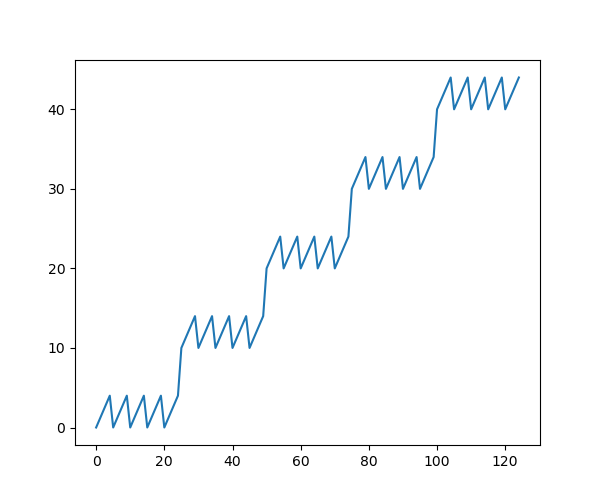

In [113]:
# testing of list repetitions
plt.close()
a = []
for i in range(5):
    b= []
    for j in range(10*i,10*i+5):
        b.append(j)
    a.extend(b*5)
plt.plot(a)
plt.show()

In [130]:
list(range(0,11,3))

[0, 3, 6, 9]

In [145]:
1000/(1700//100)

58.8235294117647